In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.optimizers import Adam
from tabulate import tabulate
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Merger Dataset

In [ ]:
#path = '/content/drive/MyDrive/Tugas Akhir/Dataset/TA'

In [ ]:
# list all file csv yang ada pada folder drive
#file_list = [f for f in os.listdir(path) if f.endswith('.csv')]

# list kosong untuk menyimpan dataframe
#df_all = []

# looping untuk setiap file csv
#for file_name in file_list:
    #file_path = os.path.join(path, file_name)

    # read file csv dalam dataframe
    #df = pd.read_csv(file_path)

    # add result dataframe ke list
    #df_all.append(df)

# menggabungkan semua dataframe menjadi satu
#dataset_reject = pd.concat(df_all, ignore_index=True)

In [ ]:
#dataset_reject

In [ ]:
#dataset_after_merge = '/content/drive/MyDrive/Tugas Akhir/Dataset/Reject/dataset.csv'
#dataset_reject.to_csv(dataset_after_merge, index=False)

**Aggregasi Data ke Per Jam**

In [ ]:
# df_reject['hour'] = df_reject['date_time'].dt.hour

# Mengubah nilai dalam kolom 'date_time menjadi dibulatkan ke jam terdekat
# df_reject['date_time'] = df_reject['date_time'].dt.floor('h')

# Agregasi per jam dengan mengambil nilai max
# df_reject = df_reject.groupby('date_time').max().reset_index()
# df_reject

##**Load Dataset**

In [43]:
# Membaca file CSV
file_path = "/content/drive/My Drive/Tugas Akhir/Dataset/Data/dataset_agg.csv"
df_reject = pd.read_csv(file_path)
df_reject
# mengonversi column datetime ke format datetime(datetime64)
# df = pd.read_csv(file_path, parse_dates=["datetime"])

# Indexing dalam dataframe
#df.set_index("datetime", inplace=True)
#df

,date_time,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,displacement_lower,total_reject
0,2024-01-09 08:00:00,58.0,20.0,0.0,92.0,0,0.0,92.0
1,2024-01-09 09:00:00,55.0,22.0,1.0,97.0,0,0.0,97.0
2,2024-01-09 10:00:00,53.0,22.0,1.0,49.0,0,0.0,50.0
3,2024-01-09 11:00:00,56.0,23.0,2.0,81.0,0,0.0,83.0
4,2024-01-09 12:00:00,56.0,25.0,3.0,209.0,0,0.0,212.0
...,...,...,...,...,...,...,...,...
1724,2024-12-13 18:00:00,64.0,24.0,0.0,19.0,1,0.0,20.0
1725,2024-12-13 19:00:00,62.0,24.0,0.0,22.0,3,0.0,25.0
1726,2024-12-13 20:00:00,61.0,24.0,0.0,31.0,3,0.0,34.0
1727,2024-12-13 21:00:00,65.0,24.0,0.0,36.0,3,0.0,39.0


## **Data Understanding**


In [ ]:
# change column name
df_reject = df_reject.rename(columns={
    "datetime": "date_time",
    "int_pressure_measurement": "pressure_measurement",
    "int_pressure_upper": "pressure_upper",
    "int_pressure_lower": "pressure_lower",
    "total": "total_reject"})
df_reject

,date_time,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,displacement_lower,total_reject
0,2024-01-09 08:00:00,58.0,20.0,0.0,92.0,0,0.0,92.0
1,2024-01-09 09:00:00,55.0,22.0,1.0,97.0,0,0.0,97.0
2,2024-01-09 10:00:00,53.0,22.0,1.0,49.0,0,0.0,50.0
3,2024-01-09 11:00:00,56.0,23.0,2.0,81.0,0,0.0,83.0
4,2024-01-09 12:00:00,56.0,25.0,3.0,209.0,0,0.0,212.0
...,...,...,...,...,...,...,...,...
1724,2024-12-13 18:00:00,64.0,24.0,0.0,19.0,1,0.0,20.0
1725,2024-12-13 19:00:00,62.0,24.0,0.0,22.0,3,0.0,25.0
1726,2024-12-13 20:00:00,61.0,24.0,0.0,31.0,3,0.0,34.0
1727,2024-12-13 21:00:00,65.0,24.0,0.0,36.0,3,0.0,39.0


#### Menilai Kualitas Data

In [ ]:
# Cek Statistik Dasar
df_reject.describe()

,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,displacement_lower,total_reject
count,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.0,1729.000000
mean,42.163678,17.060150,16.101215,137.053210,1.136495,0.0,154.234239
std,26.155990,10.027674,67.639479,210.331076,3.965548,0.0,247.981203
min,-18.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,15.000000,0.000000,1.000000,0.000000,0.0,3.000000
50%,56.000000,21.000000,1.000000,63.000000,0.000000,0.0,72.000000
75%,60.000000,24.000000,9.000000,186.000000,0.000000,0.0,207.000000
max,68.000000,35.000000,831.000000,3212.000000,61.000000,0.0,3813.000000


#### Missing Value
**Melihat Jumlah Missing Value**

In [ ]:
# Karena ada NaN dalam date_time jadi tidak bisa langsung di konversi ke tipe data datetime, harus handle missing value dan hapus jika sedikit
# Berapa banyak NaN?
# df_reject.reset_index(drop=True, inplace=True)
# df_reject.isnull().sum()
# print(df_reject["date_time"].isna().sum())
# print(df_reject.index.isna().sum())
print('Jumlah NaN:', df_reject.isna().sum())

# Melihat data yang gagal diproses
# print(df_reject[df_reject["total_reject"].isna()])
# print(df_reject[df_reject.isna()])

Jumlah NaN: date_time                   0
pressure_measurement        0
displacement_measurement    0
pressure_upper              0
pressure_lower              0
displacement_upper          0
displacement_lower          0
total_reject                0
dtype: int64


## **Data Preparation**

**Ubah Tipe Data**

In [44]:
# Tipe data yang mewakili data tanggal/waktu diubah menjadi datetime
df_reject.date_time = df_reject.date_time.astype("datetime64[ns]")
df_reject.displacement_upper = df_reject.displacement_upper.astype("float64")

#df_reject["date_time"] = pd.to_datetime(df_reject["date_time"], errors='coerce')
df_reject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_time                 1729 non-null   datetime64[ns]
 1   pressure_measurement      1729 non-null   float64       
 2   displacement_measurement  1729 non-null   float64       
 3   pressure_upper            1729 non-null   float64       
 4   pressure_lower            1729 non-null   float64       
 5   displacement_upper        1729 non-null   float64       
 6   displacement_lower        1729 non-null   float64       
 7   total_reject              1729 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 108.2 KB


In [45]:
df_reject_copy = df_reject.copy()
df_reject_copy

,date_time,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,displacement_lower,total_reject
0,2024-01-09 08:00:00,58.0,20.0,0.0,92.0,0.0,0.0,92.0
1,2024-01-09 09:00:00,55.0,22.0,1.0,97.0,0.0,0.0,97.0
2,2024-01-09 10:00:00,53.0,22.0,1.0,49.0,0.0,0.0,50.0
3,2024-01-09 11:00:00,56.0,23.0,2.0,81.0,0.0,0.0,83.0
4,2024-01-09 12:00:00,56.0,25.0,3.0,209.0,0.0,0.0,212.0
...,...,...,...,...,...,...,...,...
1724,2024-12-13 18:00:00,64.0,24.0,0.0,19.0,1.0,0.0,20.0
1725,2024-12-13 19:00:00,62.0,24.0,0.0,22.0,3.0,0.0,25.0
1726,2024-12-13 20:00:00,61.0,24.0,0.0,31.0,3.0,0.0,34.0
1727,2024-12-13 21:00:00,65.0,24.0,0.0,36.0,3.0,0.0,39.0


In [46]:
# Cek tipe data semua kolom
print(df_reject_copy.dtypes)

date_time                   datetime64[ns]
pressure_measurement               float64
displacement_measurement           float64
pressure_upper                     float64
pressure_lower                     float64
displacement_upper                 float64
displacement_lower                 float64
total_reject                       float64
dtype: object


In [47]:
# Menghapus kolom date_time karena memiliki tipe data 'period' yang tidak dapat diproses oleh fungsi corr()
df_reject_copy.drop(columns=['date_time'], inplace=True)
df_reject_copy

,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,displacement_lower,total_reject
0,58.0,20.0,0.0,92.0,0.0,0.0,92.0
1,55.0,22.0,1.0,97.0,0.0,0.0,97.0
2,53.0,22.0,1.0,49.0,0.0,0.0,50.0
3,56.0,23.0,2.0,81.0,0.0,0.0,83.0
4,56.0,25.0,3.0,209.0,0.0,0.0,212.0
...,...,...,...,...,...,...,...
1724,64.0,24.0,0.0,19.0,1.0,0.0,20.0
1725,62.0,24.0,0.0,22.0,3.0,0.0,25.0
1726,61.0,24.0,0.0,31.0,3.0,0.0,34.0
1727,65.0,24.0,0.0,36.0,3.0,0.0,39.0


**Menghitung matriks korelasi menggunakan Spearman**

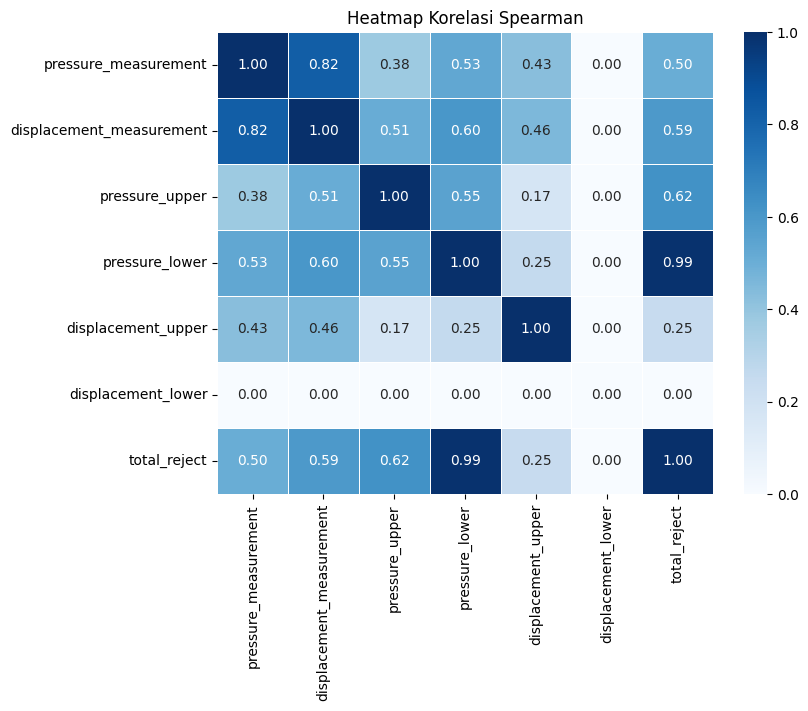

In [48]:
import seaborn as sns

# Hitung matriks korelasi menggunakan korelasi spearman, karena spearman tidak sensitif dengan data outlier dan polanya tidak harus linear
correlation_matrix = df_reject_copy.corr(method='spearman')

# Ganti nilai kosong menjadi 0.0 supaya tidak kosong di heatmap
correlation_matrix.fillna(0.0, inplace=True)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5) # Now 'sns' is defined and can be used
plt.title("Heatmap Korelasi Spearman")
plt.show()

In [49]:
# Hapus kolom displacement yang tidak memiliki korelasi
df_reject = df_reject.drop(columns=['displacement_lower'])

### **Feature Engineering**

In [50]:
# Mengonversi kolom date_time menjadi format datetime
df_reject['date_time'] = pd.to_datetime(df_reject['date_time'])

In [51]:
# Membuat fitur turunan dari setiap datetime untuk mempelajari pola waktu
df_reject['year'] = df_reject['date_time'].dt.year
df_reject['month'] = df_reject['date_time'].dt.month
df_reject['day_of_week'] = df_reject['date_time'].dt.day_of_week
df_reject['day'] = df_reject['date_time'].dt.day
df_reject['hour'] = df_reject['date_time'].dt.hour

# Mengubah jam dalam bentuk siklikal menggunakan fungsi sinus dan kosinus
df_reject['hour_sin'] = np.sin(2 * np.pi * df_reject['hour'] / 24)
df_reject['hour_cos'] = np.cos(2 * np.pi * df_reject['hour'] / 24)

# Menjadikan kolom 'date_time' sebagai index dari dataframe
df_reject.set_index('date_time', inplace=True)
df_reject

,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,total_reject,year,month,day_of_week,day,hour,hour_sin,hour_cos
date_time,,,,,,,,,,,,,
2024-01-09 08:00:00,58.0,20.0,0.0,92.0,0.0,92.0,2024,1,1,9,8,8.660254e-01,-5.000000e-01
2024-01-09 09:00:00,55.0,22.0,1.0,97.0,0.0,97.0,2024,1,1,9,9,7.071068e-01,-7.071068e-01
2024-01-09 10:00:00,53.0,22.0,1.0,49.0,0.0,50.0,2024,1,1,9,10,5.000000e-01,-8.660254e-01
2024-01-09 11:00:00,56.0,23.0,2.0,81.0,0.0,83.0,2024,1,1,9,11,2.588190e-01,-9.659258e-01
2024-01-09 12:00:00,56.0,25.0,3.0,209.0,0.0,212.0,2024,1,1,9,12,1.224647e-16,-1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-13 18:00:00,64.0,24.0,0.0,19.0,1.0,20.0,2024,12,4,13,18,-1.000000e+00,-1.836970e-16
2024-12-13 19:00:00,62.0,24.0,0.0,22.0,3.0,25.0,2024,12,4,13,19,-9.659258e-01,2.588190e-01
2024-12-13 20:00:00,61.0,24.0,0.0,31.0,3.0,34.0,2024,12,4,13,20,-8.660254e-01,5.000000e-01


In [52]:
# Moving average
# Menghitung rolling window (jendela bergerak) sepanjang 3 baris pada kolom total_reject
df_reject['ma_3'] = df_reject['total_reject'].rolling(window=3, min_periods=1).mean()
df_reject

,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,total_reject,year,month,day_of_week,day,hour,hour_sin,hour_cos,ma_3
date_time,,,,,,,,,,,,,,
2024-01-09 08:00:00,58.0,20.0,0.0,92.0,0.0,92.0,2024,1,1,9,8,8.660254e-01,-5.000000e-01,92.000000
2024-01-09 09:00:00,55.0,22.0,1.0,97.0,0.0,97.0,2024,1,1,9,9,7.071068e-01,-7.071068e-01,94.500000
2024-01-09 10:00:00,53.0,22.0,1.0,49.0,0.0,50.0,2024,1,1,9,10,5.000000e-01,-8.660254e-01,79.666667
2024-01-09 11:00:00,56.0,23.0,2.0,81.0,0.0,83.0,2024,1,1,9,11,2.588190e-01,-9.659258e-01,76.666667
2024-01-09 12:00:00,56.0,25.0,3.0,209.0,0.0,212.0,2024,1,1,9,12,1.224647e-16,-1.000000e+00,115.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-13 18:00:00,64.0,24.0,0.0,19.0,1.0,20.0,2024,12,4,13,18,-1.000000e+00,-1.836970e-16,15.333333
2024-12-13 19:00:00,62.0,24.0,0.0,22.0,3.0,25.0,2024,12,4,13,19,-9.659258e-01,2.588190e-01,20.333333
2024-12-13 20:00:00,61.0,24.0,0.0,31.0,3.0,34.0,2024,12,4,13,20,-8.660254e-01,5.000000e-01,26.333333


In [53]:
# Menambhakan fitur historis lag 1 dan lag 2
# shift(n) menggeser data sebanyak n baris ke bawah (ke masa lalu)
df_reject['lag_1'] = df_reject['total_reject'].shift(1)
df_reject['lag_2'] = df_reject['total_reject'].shift(2)

# Prediksi ke depan
# shift(-1) menggeser data ke atas 1 baris (ke masa depan)
df_reject['target'] = df_reject['total_reject'].shift(-1)
df_reject

,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,total_reject,year,month,day_of_week,day,hour,hour_sin,hour_cos,ma_3,lag_1,lag_2,target
date_time,,,,,,,,,,,,,,,,,
2024-01-09 08:00:00,58.0,20.0,0.0,92.0,0.0,92.0,2024,1,1,9,8,8.660254e-01,-5.000000e-01,92.000000,NaN,NaN,97.0
2024-01-09 09:00:00,55.0,22.0,1.0,97.0,0.0,97.0,2024,1,1,9,9,7.071068e-01,-7.071068e-01,94.500000,92.0,NaN,50.0
2024-01-09 10:00:00,53.0,22.0,1.0,49.0,0.0,50.0,2024,1,1,9,10,5.000000e-01,-8.660254e-01,79.666667,97.0,92.0,83.0
2024-01-09 11:00:00,56.0,23.0,2.0,81.0,0.0,83.0,2024,1,1,9,11,2.588190e-01,-9.659258e-01,76.666667,50.0,97.0,212.0
2024-01-09 12:00:00,56.0,25.0,3.0,209.0,0.0,212.0,2024,1,1,9,12,1.224647e-16,-1.000000e+00,115.000000,83.0,50.0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-13 18:00:00,64.0,24.0,0.0,19.0,1.0,20.0,2024,12,4,13,18,-1.000000e+00,-1.836970e-16,15.333333,16.0,10.0,25.0
2024-12-13 19:00:00,62.0,24.0,0.0,22.0,3.0,25.0,2024,12,4,13,19,-9.659258e-01,2.588190e-01,20.333333,20.0,16.0,34.0
2024-12-13 20:00:00,61.0,24.0,0.0,31.0,3.0,34.0,2024,12,4,13,20,-8.660254e-01,5.000000e-01,26.333333,25.0,20.0,39.0


In [54]:
# Menghapus nilai NaN
df_reject = df_reject.dropna()
df_reject

,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,total_reject,year,month,day_of_week,day,hour,hour_sin,hour_cos,ma_3,lag_1,lag_2,target
date_time,,,,,,,,,,,,,,,,,
2024-01-09 10:00:00,53.0,22.0,1.0,49.0,0.0,50.0,2024,1,1,9,10,5.000000e-01,-8.660254e-01,79.666667,97.0,92.0,83.0
2024-01-09 11:00:00,56.0,23.0,2.0,81.0,0.0,83.0,2024,1,1,9,11,2.588190e-01,-9.659258e-01,76.666667,50.0,97.0,212.0
2024-01-09 12:00:00,56.0,25.0,3.0,209.0,0.0,212.0,2024,1,1,9,12,1.224647e-16,-1.000000e+00,115.000000,83.0,50.0,280.0
2024-01-09 13:00:00,55.0,29.0,3.0,277.0,0.0,280.0,2024,1,1,9,13,-2.588190e-01,-9.659258e-01,191.666667,212.0,83.0,338.0
2024-01-09 14:00:00,53.0,24.0,4.0,334.0,0.0,338.0,2024,1,1,9,14,-5.000000e-01,-8.660254e-01,276.666667,280.0,212.0,358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-13 17:00:00,60.0,24.0,0.0,15.0,1.0,16.0,2024,12,4,13,17,-9.659258e-01,-2.588190e-01,10.333333,10.0,5.0,20.0
2024-12-13 18:00:00,64.0,24.0,0.0,19.0,1.0,20.0,2024,12,4,13,18,-1.000000e+00,-1.836970e-16,15.333333,16.0,10.0,25.0
2024-12-13 19:00:00,62.0,24.0,0.0,22.0,3.0,25.0,2024,12,4,13,19,-9.659258e-01,2.588190e-01,20.333333,20.0,16.0,34.0


In [55]:
print(df_reject.dtypes)

pressure_measurement        float64
displacement_measurement    float64
pressure_upper              float64
pressure_lower              float64
displacement_upper          float64
total_reject                float64
year                          int32
month                         int32
day_of_week                   int32
day                           int32
hour                          int32
hour_sin                    float64
hour_cos                    float64
ma_3                        float64
lag_1                       float64
lag_2                       float64
target                      float64
dtype: object


In [56]:
# Sort data berdasarkan kolom date_time
df_sorted = df_reject.sort_values('date_time')
df_sorted.columns

Index(['pressure_measurement', 'displacement_measurement', 'pressure_upper',
       'pressure_lower', 'displacement_upper', 'total_reject', 'year', 'month',
       'day_of_week', 'day', 'hour', 'hour_sin', 'hour_cos', 'ma_3', 'lag_1',
       'lag_2', 'target'],
      dtype='object')

In [57]:
# Memilih variable fitur dan target
feature = df_reject[['pressure_measurement', 'displacement_measurement', 'pressure_upper',
       'pressure_lower', 'displacement_upper', 'year', 'month', 'day_of_week', 'day', 'hour', 'hour_sin', 'hour_cos', 'ma_3', 'lag_1', 'lag_2', 'lag_3']]
target = df_reject['target']
feature

,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,year,month,day_of_week,day,hour,hour_sin,hour_cos,ma_3,lag_1,lag_2
date_time,,,,,,,,,,,,,,,
2024-01-09 10:00:00,53.0,22.0,1.0,49.0,0.0,2024,1,1,9,10,5.000000e-01,-8.660254e-01,79.666667,97.0,92.0
2024-01-09 11:00:00,56.0,23.0,2.0,81.0,0.0,2024,1,1,9,11,2.588190e-01,-9.659258e-01,76.666667,50.0,97.0
2024-01-09 12:00:00,56.0,25.0,3.0,209.0,0.0,2024,1,1,9,12,1.224647e-16,-1.000000e+00,115.000000,83.0,50.0
2024-01-09 13:00:00,55.0,29.0,3.0,277.0,0.0,2024,1,1,9,13,-2.588190e-01,-9.659258e-01,191.666667,212.0,83.0
2024-01-09 14:00:00,53.0,24.0,4.0,334.0,0.0,2024,1,1,9,14,-5.000000e-01,-8.660254e-01,276.666667,280.0,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-13 17:00:00,60.0,24.0,0.0,15.0,1.0,2024,12,4,13,17,-9.659258e-01,-2.588190e-01,10.333333,10.0,5.0
2024-12-13 18:00:00,64.0,24.0,0.0,19.0,1.0,2024,12,4,13,18,-1.000000e+00,-1.836970e-16,15.333333,16.0,10.0
2024-12-13 19:00:00,62.0,24.0,0.0,22.0,3.0,2024,12,4,13,19,-9.659258e-01,2.588190e-01,20.333333,20.0,16.0


**Split Data**

In [58]:
from sklearn.model_selection import train_test_split

# x dan y sudah didefinisikan sebelumnya dan punya 1730 baris
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, shuffle=False)
# x_train, x_test, y_train, y_test, dt_train, dt_test = train_test_split(feature, target, datetime_index, test_size=0.2, shuffle=False)

# Simpan index datetime secara manual
dt_train = x_train.index
dt_test = x_test.index

# Menampilkan ukuran data training dan testing dari X dan y
print("Ukuran x_train: ", x_train.shape)
print("Ukuran x_test: ", x_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran x_train:  (1208, 15)
Ukuran x_test:  (518, 15)
Ukuran y_train:  (1208,)
Ukuran y_test:  (518,)


In [59]:
# Fit scaler fitur input
x_scaler = RobustScaler()
x_train_scaled = x_scaler.fit_transform(x_train)

# Transform test pakai scaler yang sama
x_test_scaled = x_scaler.transform(x_test)

In [60]:
# Scaling fitur target
y_scaler = RobustScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:
# Simpan scaler input dan target
joblib.dump(x_scaler, 'x_scaler.pkl')
joblib.dump(y_scaler, 'y_scaler.pkl')

['y_scaler.pkl']

**Build Model**

In [61]:
print("x_train shape before reshape:", x_train_scaled.shape)
print(x_train_scaled.shape)
print(x_test_scaled.shape)

x_train shape before reshape: (1208, 15)
(1208, 15)
(518, 15)


In [62]:
# save_path = 'df_reject.csv'
# df_reject.to_csv(save_path, index=False)

In [63]:
# Convert DataFrames to NumPy arrays before reshaping
x_train_scaled = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_test_scaled = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))

In [64]:
# Bangun model LSTM
model = Sequential([
    LSTM(64,                                    # Jumlah unit memory LSTM 64,, untuk menangkap pola panjang
         activation='relu',                     # Fungsi aktivasi relu untuk menghitung output tiap neuron
         return_sequences=True,                 # Mengembalikan output dari setiap timestep, bukan hanya dari timestep terakhir
         input_shape=(1, x_train_scaled.shape[2])),   # Jumlah timesteps 1 ( 1 jam sebelumnya)
    Dropout(0.02),                              # Regularisasi dropout untuk mencegah overfitting
    LSTM(32, activation='relu'),                # Jumlah unit dan fungsi aktivasi relu
    Dropout(0.02),                              # Regularisasi dropout untuk mencegah overfitting
    Dense(1)                                    # Fully connected layer (dense) dengan 1 neuron output
])
learning_rate = 0.0002                         # Kecepatan model dalam memperbarui bobot selama training
optimizer = Adam(learning_rate=learning_rate)   # Optimizer adam lebih cepat dan lebih cerdas dalam menyesuaikan bobot

model.compile(optimizer=optimizer, loss='mae')  # loss mae digunakan untuk prediksi dan lebih tahan terhadap nilai outlier
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,929 (128.63 KB)

 Trainable params: 32,929 (128.63 KB)

 Non-trainable params: 0 (0.00 B)

**Data Training**

In [65]:
# Train model LSTM
history = model.fit(x_train_scaled, y_train_scaled,                   # Data input dan target output
                    epochs=100,                         # Menentukan berapa kali seluruh dataset dilatih ulang oleh model
                    batch_size=32,                      # Menentukan jumlah data yang diproses dalam satu kali update bobot (batch)
                    validation_data=(x_test_scaled, y_test_scaled))   # Digunakan untuk mengevaluasi performa model pada data yang tidak dilatih (data validasi)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 0.7086 - val_loss: 0.6083
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6656 - val_loss: 0.5645
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5840 - val_loss: 0.5051
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5917 - val_loss: 0.4784
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5668 - val_loss: 0.4547
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5377 - val_loss: 0.4169
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5296 - val_loss: 0.3835
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4810 - val_loss: 0.3726
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4458 - val_loss: 0.3628
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4105 - val_loss: 0.3717
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4086 - val_loss: 0.3727
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

**Predicted Data Testing**

In [66]:
# Prediksi pada data uji
# y_pred = model.predict(x_test)

y_pred_scaled = model.predict(x_test_scaled)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [67]:
# Inverse transform prediction dan label
y_pred_actual = y_scaler.inverse_transform(y_pred_scaled)
y_test_actual = y_scaler.inverse_transform(y_test_scaled)

In [68]:
# Hitung RMSE dan MAE
# Flatten y_pred to ensure it's 1-dimensional
y_pred_flat = y_pred_actual.flatten()
y_test_flat = y_test_actual.flatten()

**Evaluasi Model**

In [69]:
# Evaluasi model
loss = model.evaluate(x_test_scaled, y_test_scaled)
print(f"Test Loss (Scaled): {loss:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1413 
Test Loss (Scaled): 0.1924


In [70]:
# Mengukur rata rata error absolut antara nilai aktual dan nilai prediksi
mae = mean_absolute_error(y_test_flat, y_pred_flat)

# Selisih absolut terbesar antara nilai aktual dan prediksi
max_error = np.max(np.abs(y_test_flat - y_pred_flat))

# Menampilkan hasil evaluasi dua angka dibelakang koma
print(f'MAE: {mae:.2f}')
print(f'Max Error: {max_error:.2f}')

MAE: 36.94
Max Error: 1728.55


In [71]:
# Menghitung error per baris
# Dataframe untuk membandingkan
df_error = pd.DataFrame({
    'Date Time': dt_test,
    'Actual': y_test_flat,
    'Predicted': y_pred_flat})

df_error['MAE'] = np.abs(df_error['Actual'] - df_error['Predicted'])

# Ubah decimal ke nilai terdekat
df_error = df_error.round({'Actual': 0, 'Predicted': 0, 'MAE':0})
df_error = df_error.astype({'Actual': int, 'Predicted': int, 'MAE':int})

# Filter berdasarkan threshold error
df_high_error = df_error[df_error['MAE'] > 0.2].sort_values(by='MAE', ascending = False)
print(df_high_error.head(500))

              Date Time  Actual  Predicted   MAE
288 2024-11-12 02:00:00       0       1729  1729
300 2024-11-13 01:00:00       8        875   867
118 2024-11-01 01:00:00       0        574   574
361 2024-11-18 18:00:00      32        500   468
449 2024-12-05 17:00:00       0        426   426
..                  ...     ...        ...   ...
80  2024-10-30 11:00:00     153        154     1
64  2024-10-24 18:00:00     161        162     1
41  2024-10-23 12:00:00      76         77     1
36  2024-10-23 07:00:00      43         44     1
54  2024-10-24 08:00:00      53         52     1

[500 rows x 4 columns]


In [74]:
save_path = 'error_lstm(mae:36.94).csv'
df_error.to_csv(save_path, index=False)

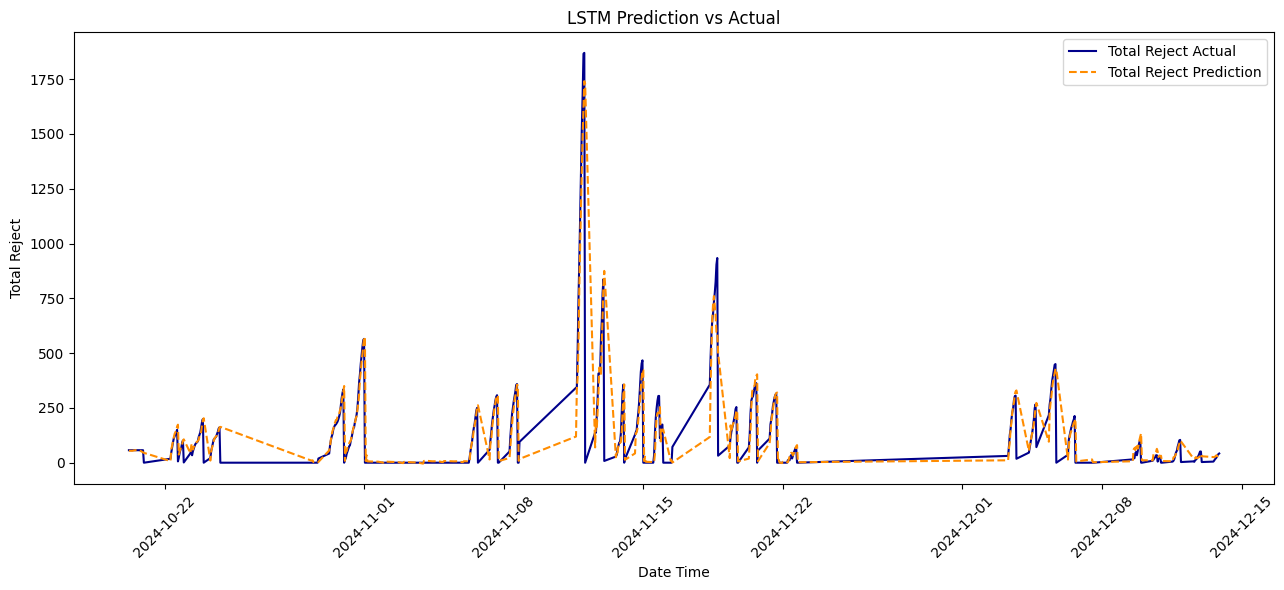

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
plt.plot(dt_test, y_test_flat, label="Total Reject Actual", linestyle="-", color="darkblue")
plt.plot(dt_test, y_pred_flat, label="Total Reject Prediction", linestyle="--", color="darkorange")

plt.xlabel("Date Time")
plt.ylabel("Total Reject")
plt.title("LSTM Prediction vs Actual")
plt.xticks(rotation=45)  # Biar waktu bisa kebaca
plt.legend()
plt.tight_layout()

# Save gambar
# plt.savefig('/content/drive/My Drive/Tugas Akhir/Gambar/Actual vs Predicted LSTM.png')
# Simpan plot ke file PNG
plt.savefig("prediction_result(robust).png", dpi=300, bbox_inches='tight')

plt.show()

In [76]:
# Membuat dataframe untuk prediksi
df_pred = pd.DataFrame({'Actual': y_test_flat, 'Predicted': y_pred_flat})
df_pred['Actual'] = df_pred['Actual'].round().astype(int)
df_pred['Predicted'] = df_pred['Predicted'].round().astype(int)
df_pred.sort_values(by='Predicted', ascending=False).head(20)

,Actual,Predicted
287,1870,1741
288,0,1729
286,1866,1611
285,1682,1493
284,1527,1344
283,1333,1168
282,1129,996
300,8,875
299,837,810
281,921,800


In [77]:
# Load data baru
file_path = "/content/drive/My Drive/Tugas Akhir/Dataset/Data Baru/databaru2.csv"
df_databaru = pd.read_csv(file_path)
df_databaru

,datetime,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,displacement_lower,total_reject
0,5/7/2025 14:00,64,26,10,9,2,0,21
1,5/7/2025 15:00,64,25,12,29,4,1,45
2,5/7/2025 16:00,62,25,14,47,4,1,65
3,5/7/2025 17:00,62,26,16,69,6,2,91
4,5/7/2025 18:00,65,24,16,101,8,3,125
5,5/7/2025 19:00,59,25,16,130,8,3,154
6,5/7/2025 20:00,63,24,16,156,8,3,180
7,5/7/2025 21:00,64,24,16,171,8,3,195
8,5/7/2025 22:00,61,26,16,185,8,3,209


In [78]:
# Mengubah tipe data datetime
df_databaru['datetime'] = pd.to_datetime(df_databaru['datetime'])
df_databaru.dtypes

,0
datetime,datetime64[ns]
pressure_measurement,int64
displacement_measurement,int64
pressure_upper,int64
pressure_lower,int64
displacement_upper,int64
displacement_lower,int64
total_reject,int64


In [79]:
# Membuat fitur turunan dari setiap datetime untuk mempelajari pola waktu
df_databaru['year'] = df_databaru['datetime'].dt.year
df_databaru['month'] = df_databaru['datetime'].dt.month
df_databaru['day_of_week'] = df_databaru['datetime'].dt.day_of_week
df_databaru['day'] = df_databaru['datetime'].dt.day
df_databaru['hour'] = df_databaru['datetime'].dt.hour

# Mengubah jam dalam bentuk siklikal menggunakan fungsi sinus dan kosinus
df_databaru['hour_sin'] = np.sin(2 * np.pi * df_databaru['hour'] / 24)
df_databaru['hour_cos'] = np.cos(2 * np.pi * df_databaru['hour'] / 24)

# Menjadikan kolom 'date_time' sebagai index dari dataframe
df_databaru.set_index('datetime', inplace=True)
df_databaru

,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,displacement_lower,total_reject,year,month,day_of_week,day,hour,hour_sin,hour_cos
datetime,,,,,,,,,,,,,,
2025-05-07 14:00:00,64,26,10,9,2,0,21,2025,5,2,7,14,-0.500000,-8.660254e-01
2025-05-07 15:00:00,64,25,12,29,4,1,45,2025,5,2,7,15,-0.707107,-7.071068e-01
2025-05-07 16:00:00,62,25,14,47,4,1,65,2025,5,2,7,16,-0.866025,-5.000000e-01
2025-05-07 17:00:00,62,26,16,69,6,2,91,2025,5,2,7,17,-0.965926,-2.588190e-01
2025-05-07 18:00:00,65,24,16,101,8,3,125,2025,5,2,7,18,-1.000000,-1.836970e-16
2025-05-07 19:00:00,59,25,16,130,8,3,154,2025,5,2,7,19,-0.965926,2.588190e-01
2025-05-07 20:00:00,63,24,16,156,8,3,180,2025,5,2,7,20,-0.866025,5.000000e-01
2025-05-07 21:00:00,64,24,16,171,8,3,195,2025,5,2,7,21,-0.707107,7.071068e-01
2025-05-07 22:00:00,61,26,16,185,8,3,209,2025,5,2,7,22,-0.500000,8.660254e-01


In [80]:
# Moving average
# Menghitung rolling window (jendela bergerak) sepanjang 3 baris pada kolom total_reject
df_databaru['ma_3'] = df_databaru['total_reject'].rolling(window=3, min_periods=1).mean()
df_databaru

,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,displacement_lower,total_reject,year,month,day_of_week,day,hour,hour_sin,hour_cos,ma_3
datetime,,,,,,,,,,,,,,,
2025-05-07 14:00:00,64,26,10,9,2,0,21,2025,5,2,7,14,-0.500000,-8.660254e-01,21.000000
2025-05-07 15:00:00,64,25,12,29,4,1,45,2025,5,2,7,15,-0.707107,-7.071068e-01,33.000000
2025-05-07 16:00:00,62,25,14,47,4,1,65,2025,5,2,7,16,-0.866025,-5.000000e-01,43.666667
2025-05-07 17:00:00,62,26,16,69,6,2,91,2025,5,2,7,17,-0.965926,-2.588190e-01,67.000000
2025-05-07 18:00:00,65,24,16,101,8,3,125,2025,5,2,7,18,-1.000000,-1.836970e-16,93.666667
2025-05-07 19:00:00,59,25,16,130,8,3,154,2025,5,2,7,19,-0.965926,2.588190e-01,123.333333
2025-05-07 20:00:00,63,24,16,156,8,3,180,2025,5,2,7,20,-0.866025,5.000000e-01,153.000000
2025-05-07 21:00:00,64,24,16,171,8,3,195,2025,5,2,7,21,-0.707107,7.071068e-01,176.333333
2025-05-07 22:00:00,61,26,16,185,8,3,209,2025,5,2,7,22,-0.500000,8.660254e-01,194.666667


In [81]:
# Menambhakan fitur historis lag 1 dan lag 2
# shift(n) menggeser data sebanyak n baris ke bawah (ke masa lalu)
df_databaru['lag_1'] = df_databaru['total_reject'].shift(1)
df_databaru['lag_2'] = df_databaru['total_reject'].shift(2)

# Prediksi ke depan
# shift(-1) menggeser data ke atas 1 baris (ke masa depan)
df_databaru['target'] = df_databaru['total_reject'].shift(-1)
df_databaru

,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,displacement_lower,total_reject,year,month,day_of_week,day,hour,hour_sin,hour_cos,ma_3,lag_1,lag_2,target
datetime,,,,,,,,,,,,,,,,,,
2025-05-07 14:00:00,64,26,10,9,2,0,21,2025,5,2,7,14,-0.500000,-8.660254e-01,21.000000,NaN,NaN,45.0
2025-05-07 15:00:00,64,25,12,29,4,1,45,2025,5,2,7,15,-0.707107,-7.071068e-01,33.000000,21.0,NaN,65.0
2025-05-07 16:00:00,62,25,14,47,4,1,65,2025,5,2,7,16,-0.866025,-5.000000e-01,43.666667,45.0,21.0,91.0
2025-05-07 17:00:00,62,26,16,69,6,2,91,2025,5,2,7,17,-0.965926,-2.588190e-01,67.000000,65.0,45.0,125.0
2025-05-07 18:00:00,65,24,16,101,8,3,125,2025,5,2,7,18,-1.000000,-1.836970e-16,93.666667,91.0,65.0,154.0
2025-05-07 19:00:00,59,25,16,130,8,3,154,2025,5,2,7,19,-0.965926,2.588190e-01,123.333333,125.0,91.0,180.0
2025-05-07 20:00:00,63,24,16,156,8,3,180,2025,5,2,7,20,-0.866025,5.000000e-01,153.000000,154.0,125.0,195.0
2025-05-07 21:00:00,64,24,16,171,8,3,195,2025,5,2,7,21,-0.707107,7.071068e-01,176.333333,180.0,154.0,209.0
2025-05-07 22:00:00,61,26,16,185,8,3,209,2025,5,2,7,22,-0.500000,8.660254e-01,194.666667,195.0,180.0,NaN


In [82]:
df_databaru = df_databaru.dropna()
df_databaru

,pressure_measurement,displacement_measurement,pressure_upper,pressure_lower,displacement_upper,displacement_lower,total_reject,year,month,day_of_week,day,hour,hour_sin,hour_cos,ma_3,lag_1,lag_2,target
datetime,,,,,,,,,,,,,,,,,,
2025-05-07 16:00:00,62,25,14,47,4,1,65,2025,5,2,7,16,-0.866025,-5.000000e-01,43.666667,45.0,21.0,91.0
2025-05-07 17:00:00,62,26,16,69,6,2,91,2025,5,2,7,17,-0.965926,-2.588190e-01,67.000000,65.0,45.0,125.0
2025-05-07 18:00:00,65,24,16,101,8,3,125,2025,5,2,7,18,-1.000000,-1.836970e-16,93.666667,91.0,65.0,154.0
2025-05-07 19:00:00,59,25,16,130,8,3,154,2025,5,2,7,19,-0.965926,2.588190e-01,123.333333,125.0,91.0,180.0
2025-05-07 20:00:00,63,24,16,156,8,3,180,2025,5,2,7,20,-0.866025,5.000000e-01,153.000000,154.0,125.0,195.0
2025-05-07 21:00:00,64,24,16,171,8,3,195,2025,5,2,7,21,-0.707107,7.071068e-01,176.333333,180.0,154.0,209.0


In [83]:
features = ['pressure_measurement', 'displacement_measurement', 'pressure_upper',
       'pressure_lower', 'displacement_upper', 'year', 'month', 'day_of_week', 'day', 'hour',
       'hour_sin', 'hour_cos', 'ma_3', 'lag_1', 'lag_2']  # Input yang digunakan untuk prediksi 1 jam ke depan

x_new = df_databaru[features].iloc[[-1]]

In [84]:
# Scale fitur sesuai scaler saat training
x_new_scaled = x_scaler.transform(x_new)

In [85]:
# Reshape untuk LSTM input
x_new_scaled = x_new_scaled.reshape((1, 1, x_new_scaled.shape[1]))

In [86]:
# Prediksi
y_pred_scaled = model.predict(x_new_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [87]:
# Inverse transform hasil prediksi ke nilai aktual
y_pred_actual = y_scaler.inverse_transform(y_pred_scaled)[0][0]

In [88]:
print(f"Prediksi total_reject untuk 1 jam ke depan: {y_pred_actual:.0f}")

Prediksi total_reject untuk 1 jam ke depan: 180


In [89]:
model.save('lstm.h5')